# SONAR Rock vs Mine Prediction

## Import libraries

In [43]:
# Built-in
import os

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Data prep
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, average_precision_score
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn.linear_model import LogisticRegression

# IO
from pickle import dump

In [44]:
%matplotlib inline

color = sns.color_palette()
random_state = 2024

## Data Importing

In [45]:
directory = os.getcwd()
file = r'\..\data\data.csv'
with open(directory + file, 'r') as f:
    sonar_df = pd.read_csv(f, header = None)
    print('OK')

OK


## Briefly describe data

In [46]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [47]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [48]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Text(0, 0.5, 'Frequency percentage')

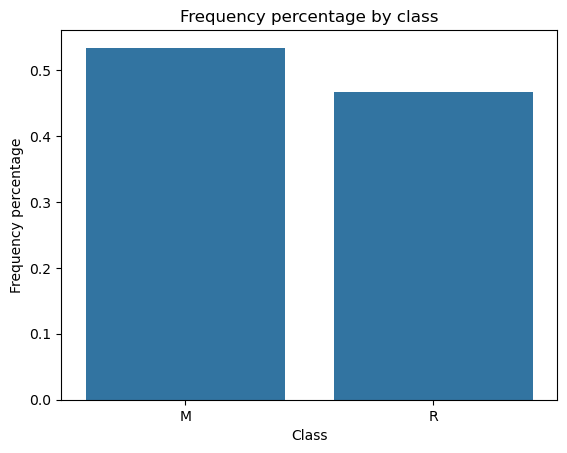

In [49]:
label_count = sonar_df.iloc[:, -1].value_counts()
ax = sns.barplot(x=label_count.index, y=label_count/len(sonar_df))
ax.set_title('Frequency percentage by class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency percentage')

## Data wrangling

In [50]:
# Transform X to 0, 1
sonar_df.iloc[:, -1] = sonar_df.iloc[:, -1].map({'M': 0, 'R': 1})

### Split data and label

In [51]:
X = sonar_df.iloc[:, 0:-1]
y = sonar_df.iloc[:, -1].astype('category')

In [52]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 60, dtype: category
Categories (2, int64): [0, 1]

### Train test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify=y, random_state=random_state)

In [55]:
print(X_train.shape, y_train.shape)

(187, 60) (187,)


## Model training

In [56]:
# Use model Logistic Regression
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
solver = 'liblinear'

log_reg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

In [57]:
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [58]:
log_reg.score(X_test, y_test)

0.7142857142857143

## Visualization

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.63')

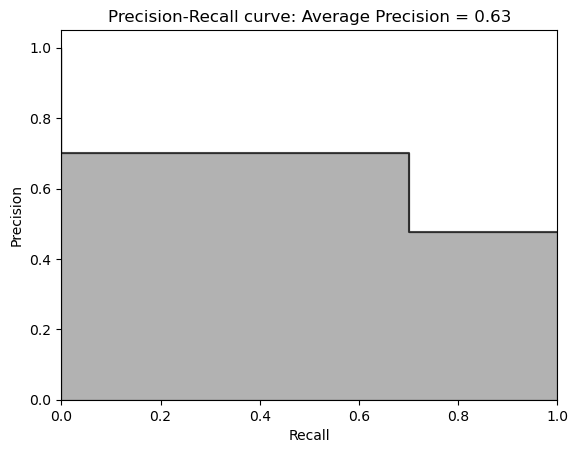

In [59]:
# Precision-recall curve 
preds = log_reg.predict(X_test)
preds = pd.DataFrame({'trueLabel': y_test.to_numpy(), 'prediction': preds})

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])

average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

plt.step(recall, precision, color='k', alpha=.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.savefig('..\images\PrecisionRecall_Curve.png')
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

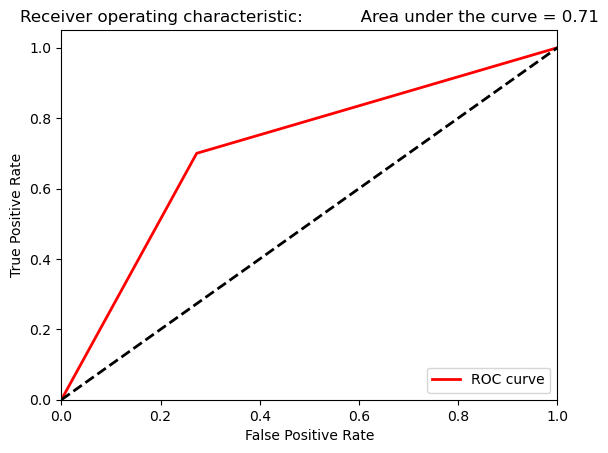

In [60]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'], preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.savefig(r'..\images\AUC_curve.png')
plt.show()

## Save Model

In [61]:
with open(r'..\model\model.pkl', 'wb') as f:
    dump(log_reg, f)